In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
data = pd.read_csv("/content/drive/MyDrive/datasets/bank_market.csv")
data

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [62]:
data.describe()

,Cust_num,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cust_num   45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [64]:
data[data["duration"]>60]["y"].value_counts()

no     35165
yes     5280
Name: y, dtype: int64

### after checking the duration column with respect to output column people who's call duration is more than 1 min have high chance to subscribe for the term deposit. total number of people whos duration is more than 1 min is :- 5280

In [65]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [66]:
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [67]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

## we will check the bar graphs of the Variable columns

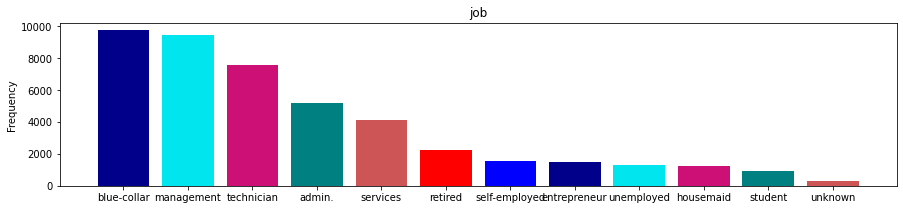

job: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


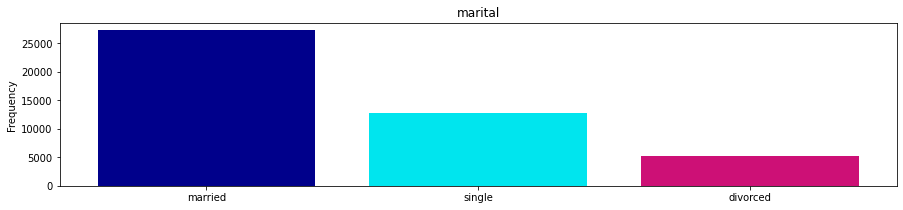

marital: 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


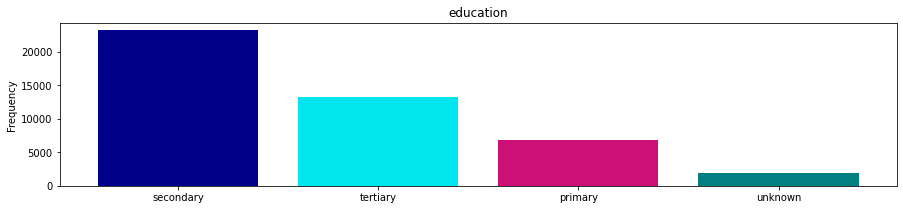

education: 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


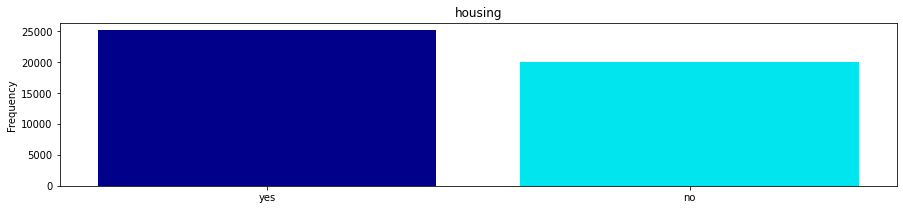

housing: 
 yes    25130
no     20081
Name: housing, dtype: int64


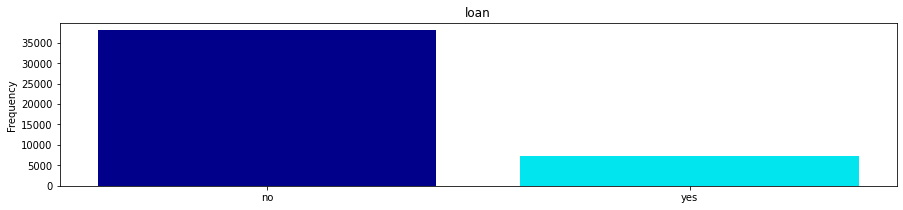

loan: 
 no     37967
yes     7244
Name: loan, dtype: int64


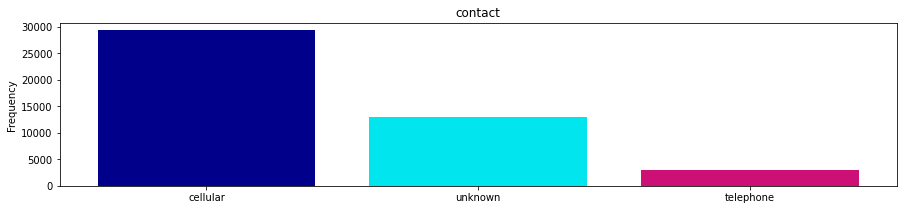

contact: 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


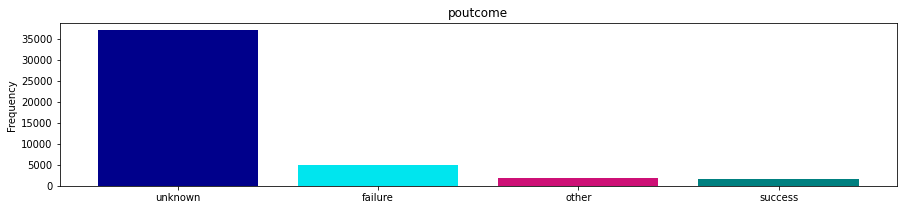

poutcome: 
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


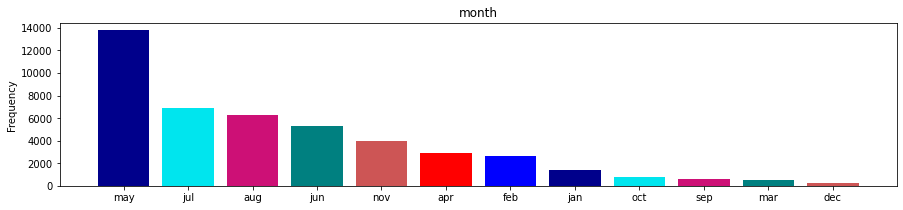

month: 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


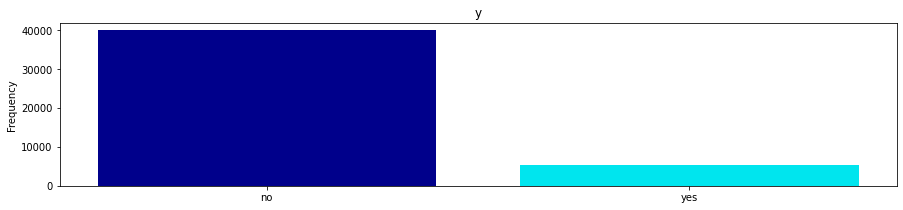

y: 
 no     39922
yes     5289
Name: y, dtype: int64


In [68]:
categoryc = ["job","marital","education","housing", "loan","contact","poutcome","month","y"]
for c in categoryc:
    bar_plot(c)

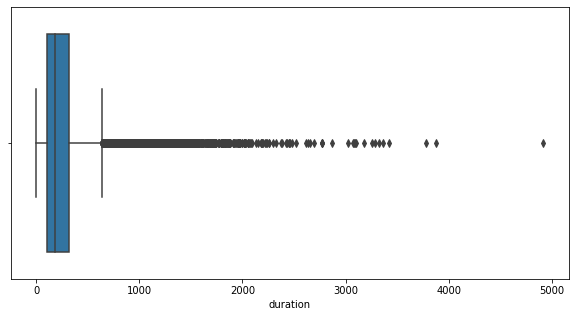

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data["duration"])
plt.show()

we Can see few outliers in duration column but it does'nt affect our model because we dont use duration columns as it is known after the call 

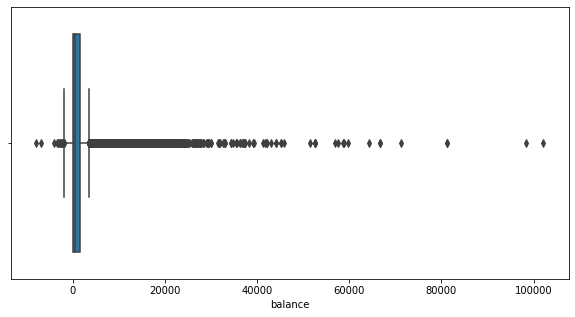

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data["balance"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


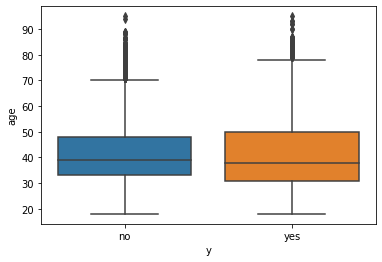

In [71]:
sns.boxplot('y','age',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


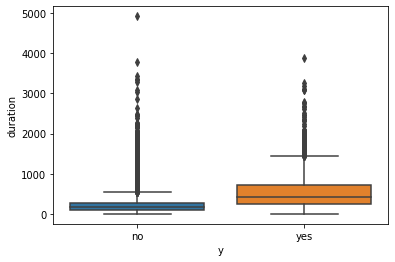

In [72]:
sns.boxplot('y','duration',data=data)

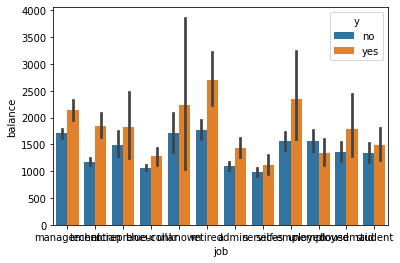

In [73]:
sns.barplot(hue = 'y',x = 'job',y='balance',data=data)

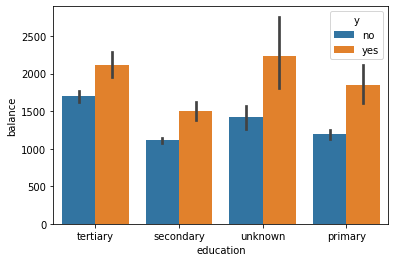

In [74]:
sns.barplot(hue = 'y',x = 'education',y='balance',data=data)

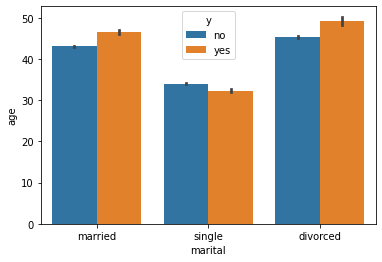

In [75]:
sns.barplot(x='marital',y='age',hue='y',data=data)

## all these boxplots show almost an equal level of balance between yes and no , no major difference betweeen these categories . But we can see yes is more if compared btw them .


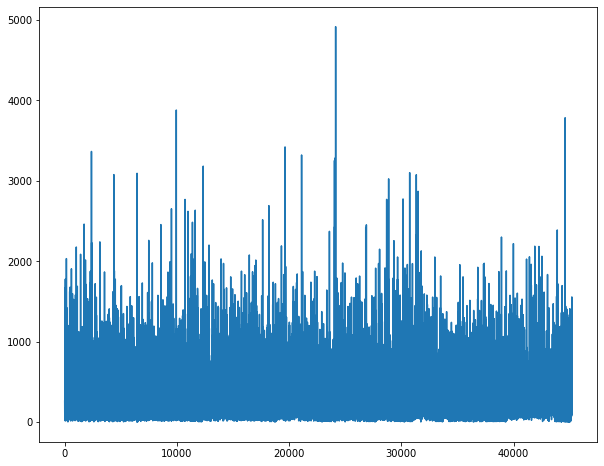

In [76]:
plt.figure(figsize=(10,8))
plt.plot(data["duration"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


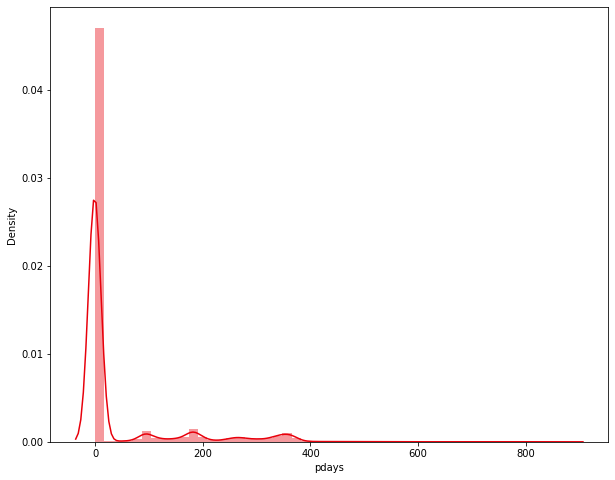

In [77]:
plt.figure(figsize=(10,8))
sns.set_color_codes(palette = "bright")
sns.distplot(data["pdays"],color="r")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


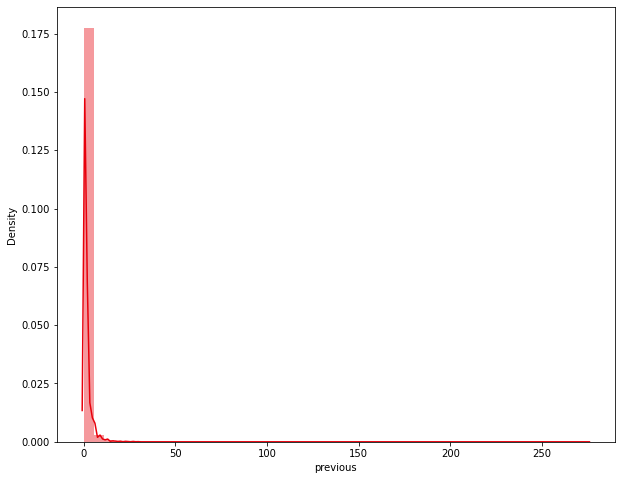

In [78]:
plt.figure(figsize=(10,8))
sns.set_color_codes(palette = "bright")
sns.distplot(data["previous"],color="r")
plt.show()

In [79]:
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(data[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

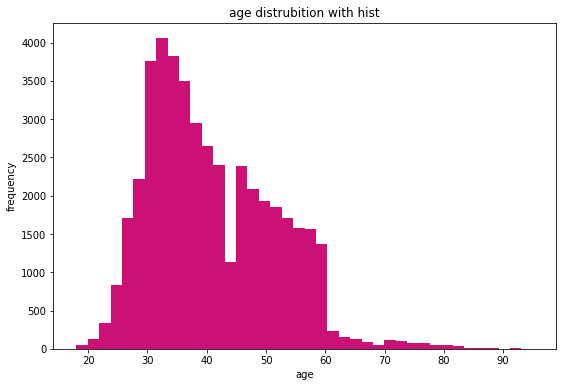

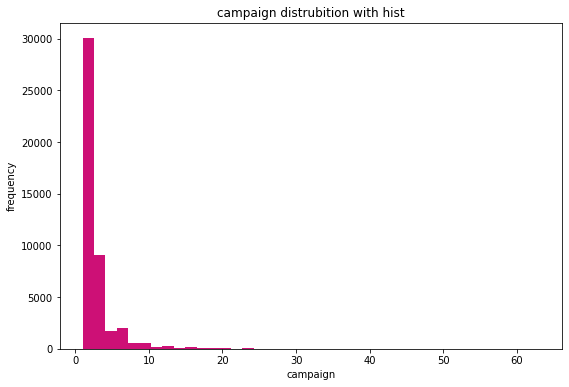

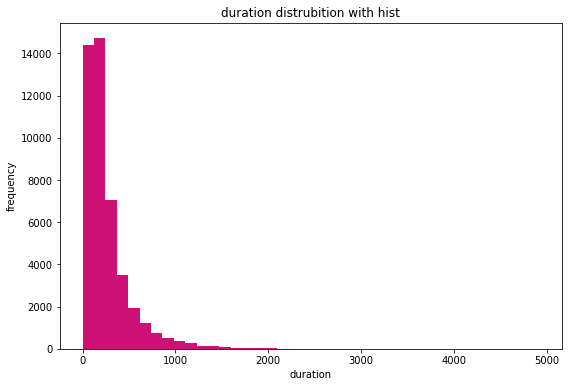

In [80]:
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

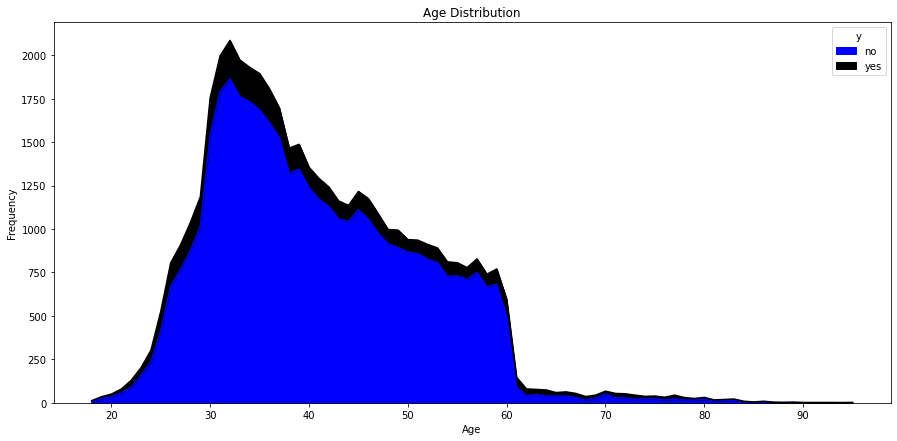

In [81]:
pd.crosstab(data.age,data.y).plot(kind="area",figsize=(15,7),color=['#0000ff','#000000' ])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## The number of people who are 25 to 40 years old with a term deposit account is high.

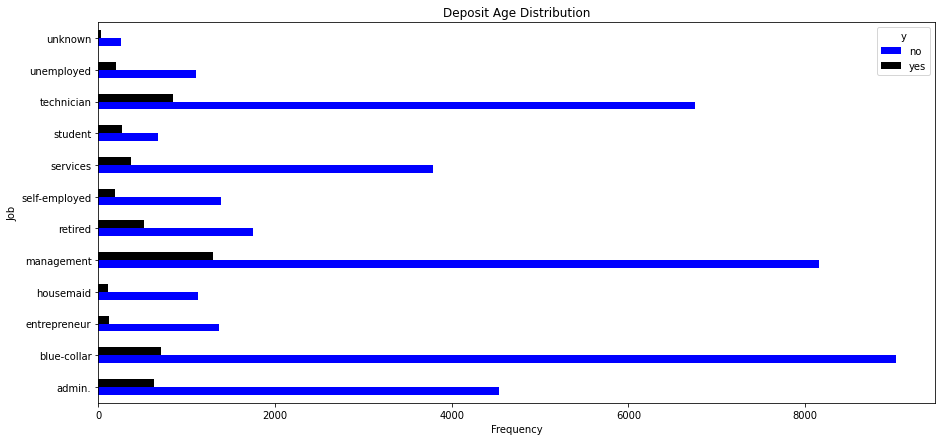

In [82]:
pd.crosstab(data.job,data.y).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Deposit Age Distribution')
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.show()

## In people at the executive level have more deposit accounts

In [83]:
data.corr()

,Cust_num,age,balance,day,duration,campaign,pdays,previous
Cust_num,1.000000,0.014973,0.073639,-0.061465,0.013031,-0.102884,0.437729,0.271098
age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.073639,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.061465,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,0.013031,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.102884,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.437729,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.271098,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


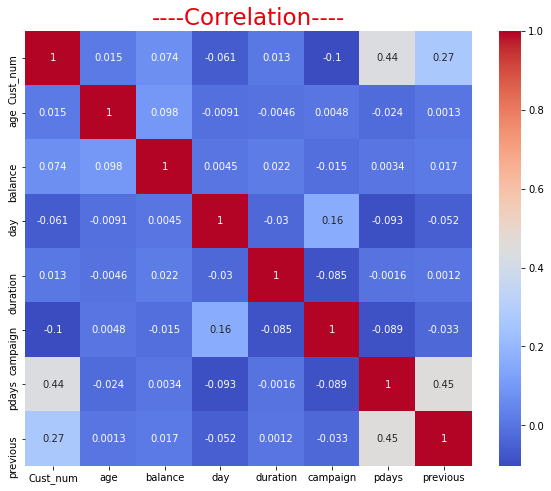

In [84]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.title("----Correlation----", size = 23, color = "r")
plt.show()

## Looking at it, there is a moderate correlation between the days and the previous ones. (r=0.45)

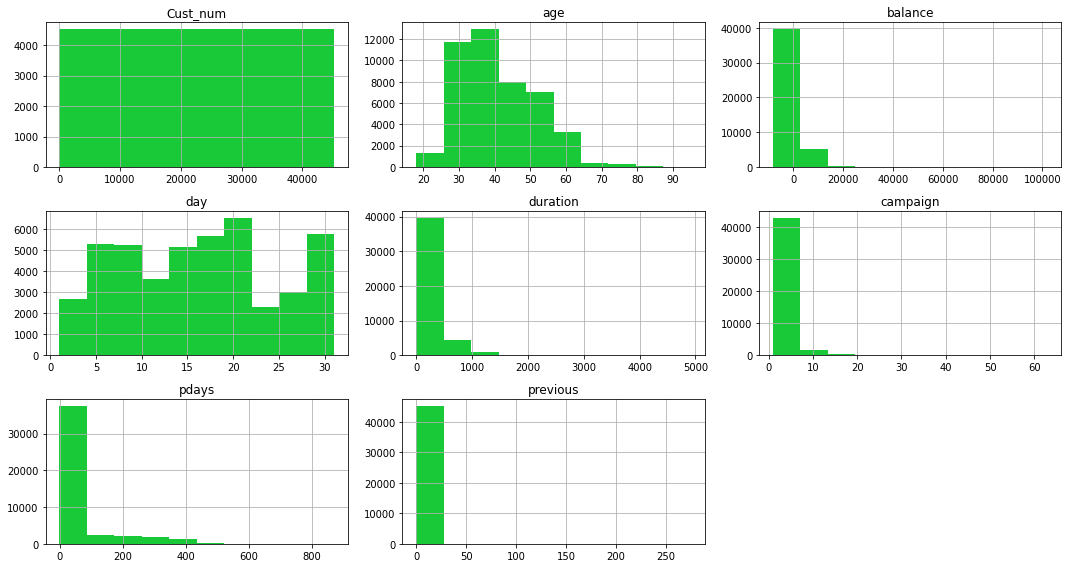

In [85]:
#plotting All columns by using Histogram
data.hist(figsize = (15,8), color = "g")
plt.tight_layout()
plt.show()

In [86]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [87]:
data.loc[detect_outliers(data,['age',
                               'day','duration','campaign','previous'])]

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40363,40364,83,retired,married,primary,no,425,no,no,telephone,22,jun,883,1,140,1,failure,yes
40957,40958,71,retired,married,secondary,no,3,no,no,cellular,13,aug,1175,3,189,1,other,no
41610,41611,83,retired,married,primary,no,425,no,no,telephone,22,sep,773,1,92,2,success,yes
41754,41755,83,retired,married,tertiary,no,6236,no,no,cellular,12,oct,766,1,62,3,failure,no
41842,41843,77,retired,married,tertiary,no,0,no,no,cellular,16,oct,847,1,60,1,success,yes
42061,42062,80,retired,married,primary,no,997,no,no,cellular,29,oct,746,2,86,1,other,yes
42325,42326,75,retired,married,tertiary,no,6027,no,no,cellular,16,nov,1248,2,94,2,failure,yes
42419,42420,73,retired,divorced,primary,no,5028,no,no,cellular,4,dec,696,10,-1,0,unknown,yes
42558,42559,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
42607,42608,73,retired,married,primary,no,1388,no,no,telephone,11,jan,767,2,83,1,success,yes


In [88]:
data=data.drop(['duration'],axis=1)

In [89]:
data.head()

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [90]:
columns=data.select_dtypes(include=[object]).columns
data=pd.concat([data,pd.get_dummies(data[columns])],axis=1)
data=data.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cust_num             45211 non-null  int64 
 1   age                  45211 non-null  int64 
 2   balance              45211 non-null  int64 
 3   campaign             45211 non-null  int64 
 4   pdays                45211 non-null  int64 
 5   previous             45211 non-null  int64 
 6   y                    45211 non-null  object
 7   job_admin.           45211 non-null  uint8 
 8   job_blue-collar      45211 non-null  uint8 
 9   job_entrepreneur     45211 non-null  uint8 
 10  job_housemaid        45211 non-null  uint8 
 11  job_management       45211 non-null  uint8 
 12  job_retired          45211 non-null  uint8 
 13  job_self-employed    45211 non-null  uint8 
 14  job_services         45211 non-null  uint8 
 15  job_student          45211 non-null  uint8 
 16  job_

,Cust_num,age,balance,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,1,58,2143,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,2,44,29,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,3,33,2,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,4,47,1506,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,5,33,1,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [91]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
data['pdays2'] = data['pdays'].apply(pdayswork)

In [92]:
data=data.drop(['y_no', 'y_yes'],axis=1)

In [93]:
def deposit1(y):
    if(y=='yes'):
        return(1)
    elif(y=='no'):
        return(0)
data['depositNew'] = data['y'].apply(deposit1)

In [94]:
data=data.drop(['y'],axis=1)

In [95]:
data.head()

,Cust_num,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays2,depositNew
0,1,58,2143,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,44,29,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,33,2,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,47,1506,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,33,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [96]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[-1.7320125   1.60696496  0.25641925 ... -0.20597248 -0.185948
   0.47251925]
 [-1.73193588  0.28852927 -0.43789469 ... -0.20597248 -0.185948
   0.47251925]
 [-1.73185926 -0.74738448 -0.44676247 ... -0.20597248 -0.185948
   0.47251925]
 ...
 [ 1.73185926  2.92540065  1.42959305 ... -0.20597248  5.37784754
  -2.11631591]
 [ 1.73193588  1.51279098 -0.22802402 ... -0.20597248 -0.185948
   0.47251925]
 [ 1.7320125  -0.37068857  0.52836436 ...  4.85501757 -0.185948
  -2.11631591]]


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

accuracies = {}
f1scores={}

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

In [99]:
print(classification_report(y_test,prediction))
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7361
           1       1.00      0.99      1.00      1682

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

Logistic Regression accuracy: 99.8230675660732
F1-Score:  99.52210274790919


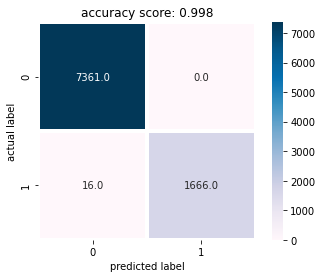

In [100]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('accuracy score: {0}'.format(score),size=12)
plt.show()